# Report from neural network task

In [ ]:
from experiment import experiment, plot_costs
from model_torch import TorchModel, MnistDataset, torch_train
from preprocessing import MnistDataloader
import torch
import numpy as np
import pandas as pd

## Data preprocessing
MNIST dataset is used for training and testing custom neural network. Images are loaded and preprocessed using a MnistDataLoader class from a kaggle notebook (https://www.kaggle.com/code/hojjatk/read-mnist-dataset). DataLoader class is slightly modified to return images and labels in `np.ndarray` format and split `train-images` and `train-labels` into train and validation sets.

In [ ]:
mnist_dataloader = MnistDataloader("train-images-idx3-ubyte", "train-labels-idx1-ubyte", "t10k-images.idx3-ubyte", "t10k-labels.idx1-ubyte")
data_train, data_val, data_test = mnist_dataloader.load_data()

ValueError: too many values to unpack (expected 4)

## Neural network and experiments

In [13]:
models_to_test = [[((784, 256), "relu"), ((256, 128), "relu"), ((128, 64), "relu"), ((64, 10), "softmax")],
                  [((784, 128), "relu"), ((128, 64), "relu"), ((64, 10), "softmax")],
                  [((784, 64), "relu"), ((64, 10), "softmax")],
                  [((784, 10), "softmax")]]
learning_rates_to_test = [3e-4, 3e-3, 3e-2, 3e-2]
batch_sizes = [128, 128, 64, 64]
epochs = 50

In [14]:
losses, train_accuracies, val_accuracies = experiment(data_train, data_val, models_to_test,  epochs, learning_rates_to_test, batch_sizes)

Epoch: 0, loss: 0.05323426211514434


KeyboardInterrupt: 

In [ ]:
results = pd.DataFrame({"model": models_to_test, "learning_rate": learning_rates_to_test, "batch_size": batch_sizes, "train_accuracy": train_accuracies, "val_accuracy": val_accuracies})
results

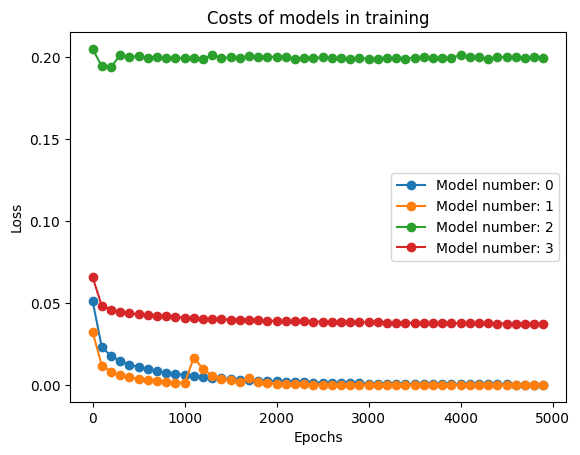

In [ ]:
plot_costs(losses)

## Comparison to Pytorch neural network training

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dataset = MnistDataset(np.array(y_train), np.array(x_train))
torch_model = TorchModel(device)

In [ ]:
torch_train(dataset, torch_model, 3e-4, 100, 128)

Loss:7.183226585388184
Loss:5.526722431182861
Loss:5.632143020629883
Loss:4.806131362915039
Loss:4.688581943511963
Loss:4.7320780754089355
Loss:4.388777732849121
Loss:4.280552387237549
Loss:3.8892598152160645
Loss:4.133275985717773
Loss:3.5533838272094727
Loss:3.6376161575317383
Loss:3.6535890102386475
Loss:3.619192123413086
Loss:3.247619390487671
Loss:3.2427988052368164
Loss:3.1567389965057373
Loss:3.2508623600006104
Loss:3.12253999710083
Loss:3.07212233543396
Loss:2.838172197341919
Loss:2.819213628768921
Loss:2.9339609146118164
Loss:2.758969783782959
Loss:2.686230182647705
Loss:2.6710498332977295
Loss:2.5008907318115234
Loss:2.6712229251861572
Loss:2.5591840744018555
Loss:2.8358194828033447
Loss:2.4263806343078613
Loss:2.398364305496216
Loss:2.4989407062530518
Loss:2.1339433193206787
Loss:2.5319674015045166
Loss:2.1941096782684326
Loss:2.3115954399108887
Loss:2.4435923099517822
Loss:2.187356472015381
Loss:2.3480963706970215
Loss:2.1209006309509277
Loss:2.0830483436584473
Loss:1.91945

KeyboardInterrupt: 

In [ ]:
def predict(x, model):
    y_pred = model(x.to(device))
    return y_pred

In [ ]:
print(predict(torch.tensor(x_test[0], dtype=torch.float32), torch_model))

torch.Size([28, 28])
xd torch.Size([256, 784])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (28x28 and 784x256)

# Results
# Conclusions

# Wyniki
- Najlepszą dokładność na zbiorze walidacyjnym osiągnął model trzeci, z jedną ukrytą warstwą o rozmiarze 20, learning ratem o wartości 0.006 oraz batch sizem równym 128.
- W modelu numer cztery w trakcie treningu doszło do przepełnienia.
- Pozostałe modele osiągnęły dokładność na zbiorze walidacyjnym w granicach 80-85%.
- Model trzeci na zbiorze testowym osiągnął wynik 93%.
# Wnioski
- Modele z wiekszą ilością ukrytych warstw oraz ukrytych neuronów nie zawsze osiągały wyższą dokładność. Architektura modelu powinna być ściśle dopasowana do poziomu złożoności danych - nie może być za prosta (jak w modelu 1) ani zbyt rozbudowana (jak w modelu 0).
- Częste aktualizowanie parametrów w przypadku małego batch sizu może mieć negatywny wpływ na dokładność.
- Mniejszy learning rate w modelu o bardziej rozbudowanej architekturze zapobiegał "eksplozji" gradientu.
- Dokładność treningowa nie odbiegała zbytnio od dokładności walidacyjnej (największa różnica w modelu trzecim). Nie doszło do zjawiska zbytniego overfittingu.